Question #17 by Ege Özteke

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('data/municipality_bus_utilization.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019


I first want to try working only with one municipality, say Municipality 3.

In [163]:
df3 = df.loc[df['municipality_id'] == 3]
df3.head()

,timestamp,municipality_id,usage,total_capacity
9,2017-06-04 07:59:42,3,623,1930
17,2017-06-04 08:25:42,3,770,1930
22,2017-06-04 08:59:42,3,967,1930
39,2017-06-04 09:32:46,3,1130,1930
45,2017-06-04 09:59:48,3,1263,1930


In [164]:
df3.set_index('timestamp', inplace=True)

In [165]:
#aggregating two measurements for an hour dependent on max value of usage
df3 = df3.resample('H').max()
df3.head(15)

,municipality_id,usage,total_capacity
timestamp,,,
2017-06-04 07:00:00,3.0,623.0,1930.0
2017-06-04 08:00:00,3.0,967.0,1930.0
2017-06-04 09:00:00,3.0,1263.0,1930.0
2017-06-04 10:00:00,3.0,1396.0,1930.0
2017-06-04 11:00:00,3.0,1456.0,1930.0
2017-06-04 12:00:00,3.0,1469.0,1930.0
2017-06-04 13:00:00,3.0,1457.0,1930.0
2017-06-04 14:00:00,3.0,1439.0,1930.0
2017-06-04 15:00:00,3.0,1309.0,1930.0


In [166]:
#The resample method introduced some NaN values outside the measurement hours (7:00-16:00) so I'll drop them.
df3 = df3.drop(df3.between_time("17:00", "6:00").index)
df3.head(15)

,municipality_id,usage,total_capacity
timestamp,,,
2017-06-04 07:00:00,3.0,623.0,1930.0
2017-06-04 08:00:00,3.0,967.0,1930.0
2017-06-04 09:00:00,3.0,1263.0,1930.0
2017-06-04 10:00:00,3.0,1396.0,1930.0
2017-06-04 11:00:00,3.0,1456.0,1930.0
2017-06-04 12:00:00,3.0,1469.0,1930.0
2017-06-04 13:00:00,3.0,1457.0,1930.0
2017-06-04 14:00:00,3.0,1439.0,1930.0
2017-06-04 15:00:00,3.0,1309.0,1930.0


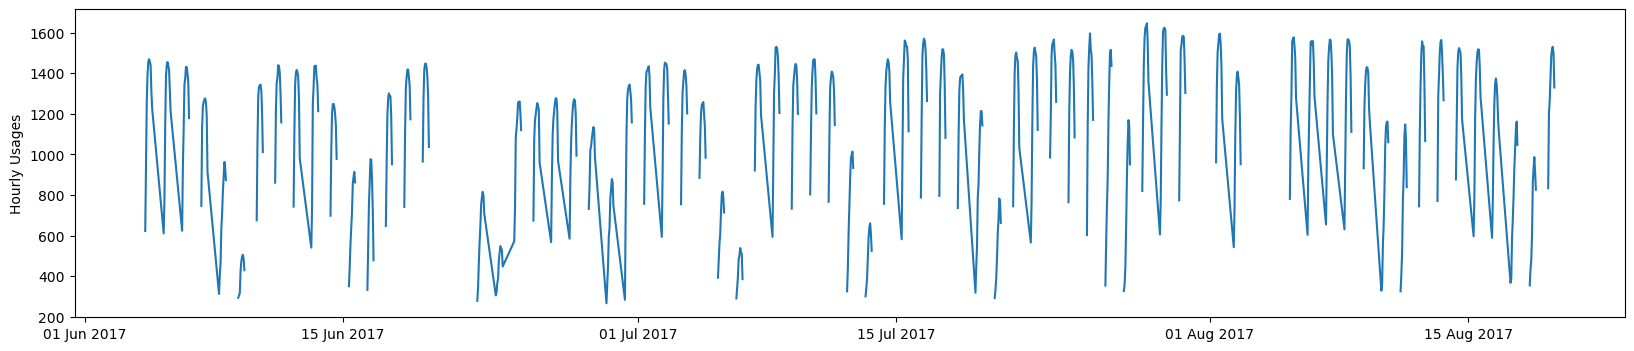

In [178]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 4))
plt.ylabel('Hourly Usages')
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1,15]))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))
ax.plot(df3.index, df3["usage"]);

As we can see, there has been some days where no measurements were made. There are some gaps in which no measurement has been made for days, so using a linear interpolation method would be useless as it doesn't depict the high frequency changes. I thought of using FFT to interpolate in frequency domain, but FFT itself needs evenly spaced data points and I couldn't apply an interpolation method that captures the pattern. I was thinking of applying different interpolation methods depending on the day gap but couldn't find any examples, so I just used the time interpolation.

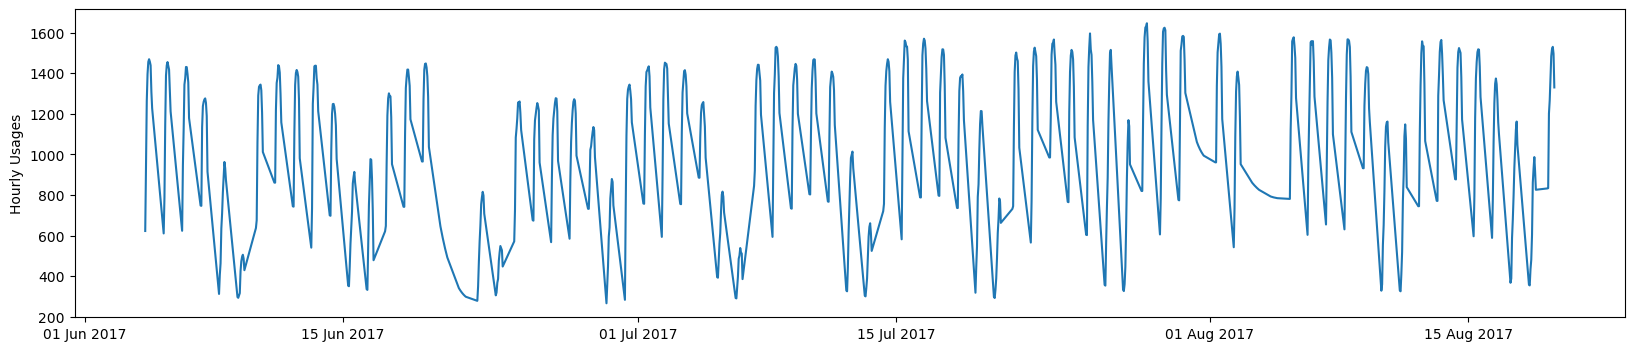

In [182]:
fig, ax = plt.subplots(figsize=(20, 4))
plt.ylabel('Hourly Usages')
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1,15]))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))
ax.plot(df3.index, df3['usage'].interpolate(method='time'));

In [149]:
#from scipy import interpolate
#time_array = (df3.index.astype(int) / 10**9).to_numpy()
#usage_array = df3['usage'].to_numpy()

<ipython-input-149-c29280f6daff>:1: FutureWarning: The behavior of .astype from datetime64[ns] to int32 is deprecated. In a future version, this astype will return exactly the specified dtype instead of int64, and will raise if that conversion overflows.
  time_array = (df3.index.astype(int) / 10**9).to_numpy()
